In [1]:

#Zoo

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")
# Load the data
data = pd.read_csv('zoo.csv')



In [3]:
print(data.head())



  animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   type  
0     1  
1     1  
2     4  
3     1  
4     1  


In [4]:
# Check for missing values
print(data.isnull().sum())



animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


In [5]:
data.info

<bound method DataFrame.info of     animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0      aardvark     1         0     0     1         0        0         1   
1      antelope     1         0     0     1         0        0         0   
2          bass     0         0     1     0         0        1         1   
3          bear     1         0     0     1         0        0         1   
4          boar     1         0     0     1         0        0         1   
..          ...   ...       ...   ...   ...       ...      ...       ...   
96      wallaby     1         0     0     1         0        0         0   
97         wasp     1         0     1     0         1        0         0   
98         wolf     1         0     0     1         0        0         1   
99         worm     0         0     1     0         0        0         0   
100        wren     0         1     1     0         1        0         0   

     toothed  backbone  breathes  venomous  fins  legs 

In [6]:
data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


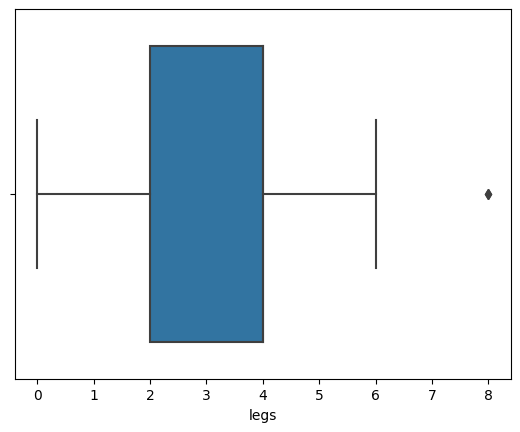

In [7]:
# Check for outliers
sns.boxplot(x=data['legs'])
plt.show()

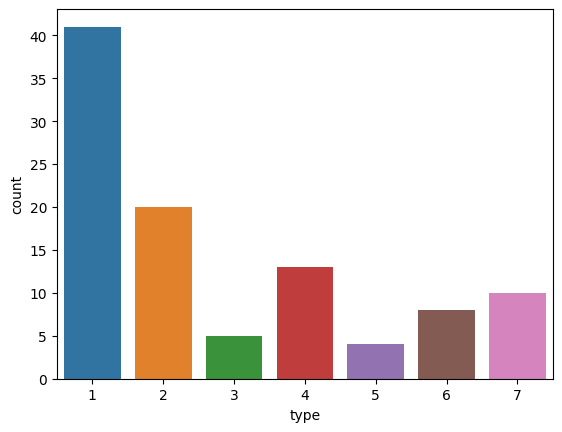

In [8]:
# Perform some basic visualizations
sns.countplot(x='type', data=data)
plt.show()

We can observe that type 1 has the largest count. So basically type 1 is the essential element in an animal.

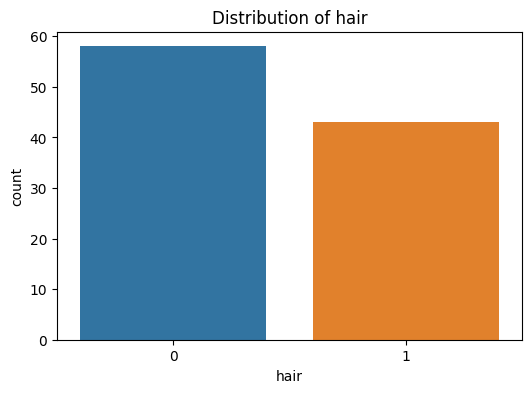

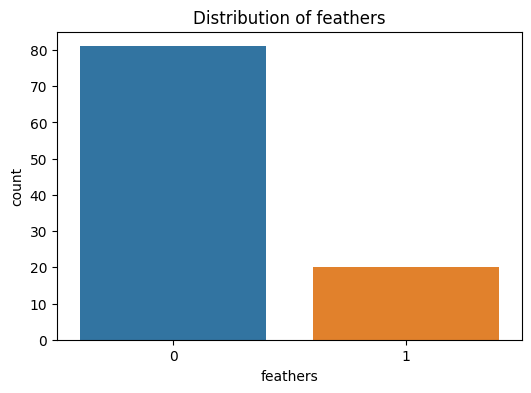

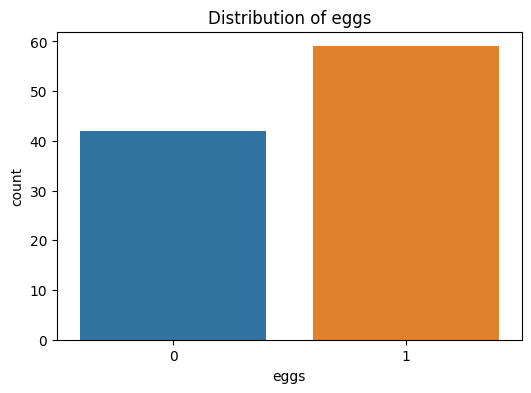

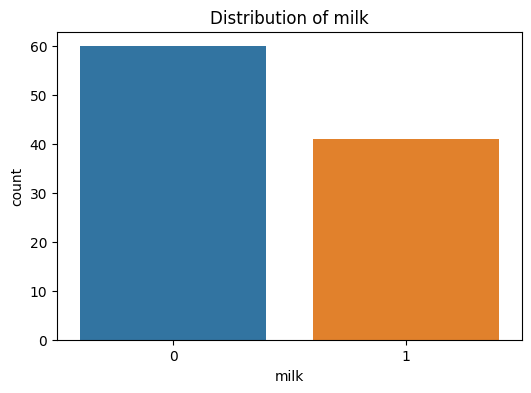

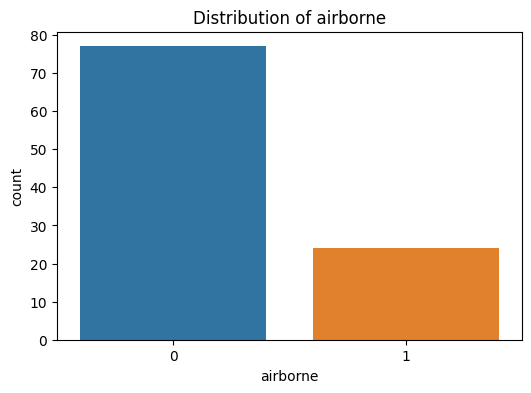

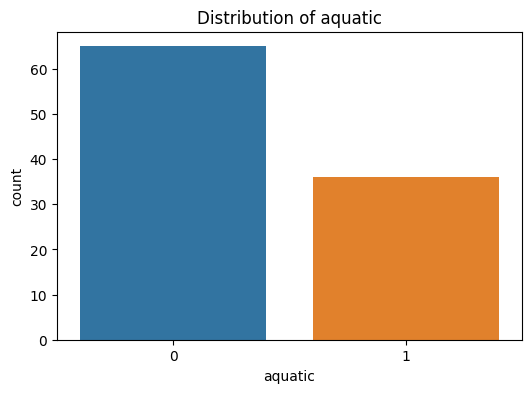

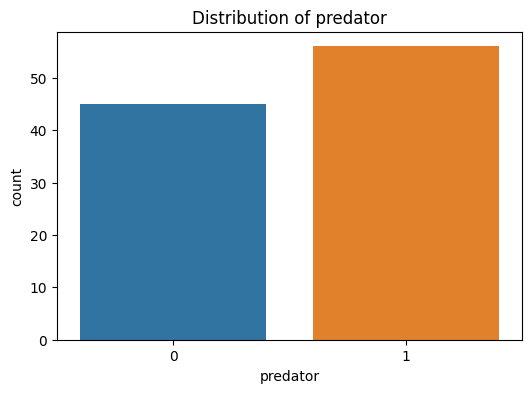

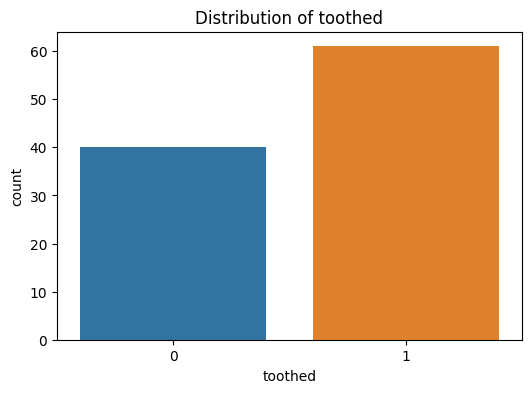

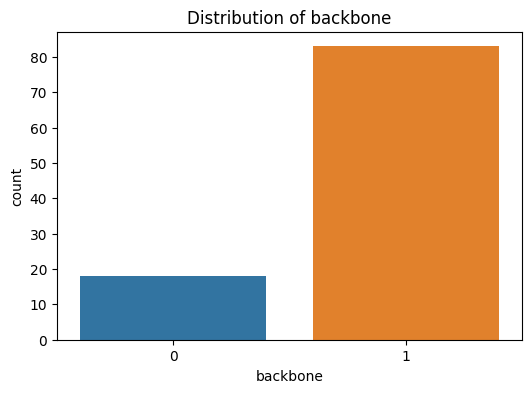

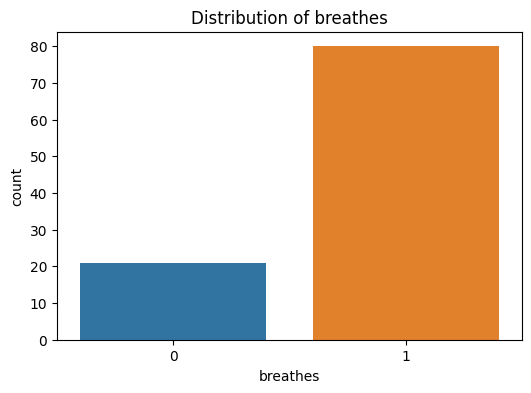

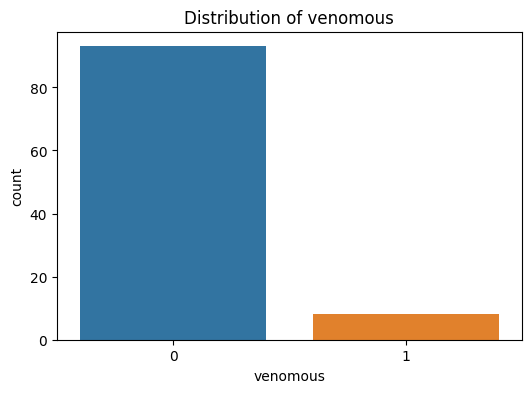

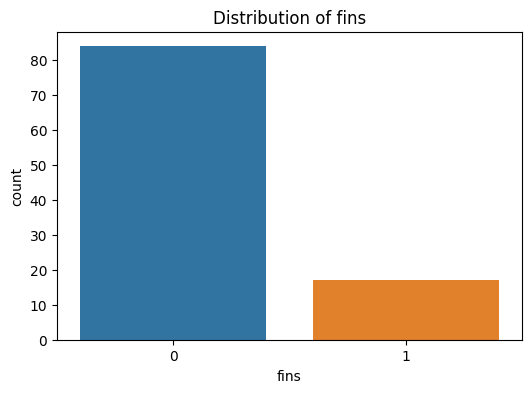

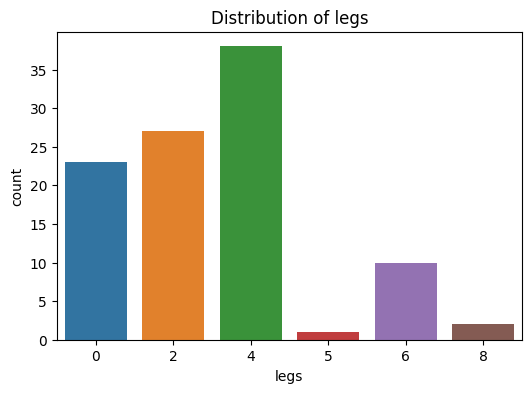

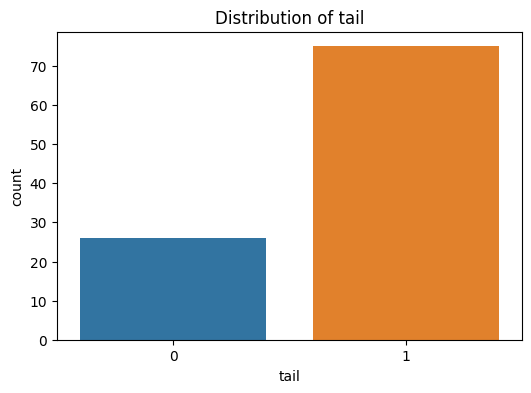

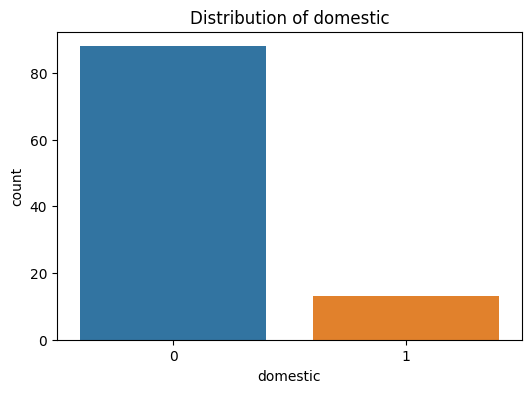

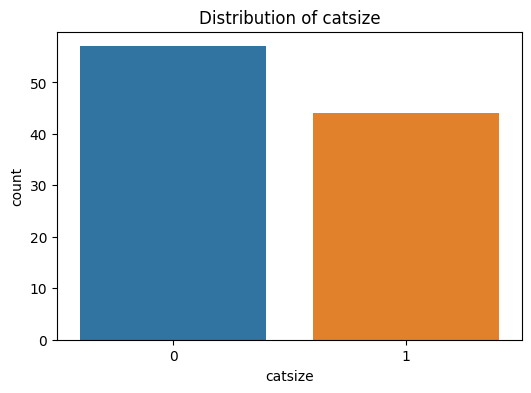

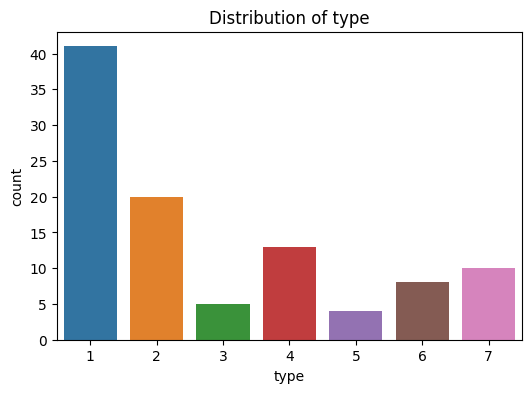

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of each feature
for feature in data.columns[1:]:
    plt.figure(figsize=(6,4))
    sns.countplot(x=feature, data=data)
    plt.title(f"Distribution of {feature}")
    plt.show()


From these plots, we can make several observations:

There are more animals without hair than with.
Most animals don't have feathers or lay eggs, but there are a few exceptions.
Most animals are not airborne, but there are some exceptions.
Most animals are not aquatic, but there are some exceptions.
Most animals are predators and toothed, but there are some exceptions.
Most animals have a backbone and breathe air.
Most animals are not venomous, but there are some exceptions.
Most animals don't have fins, but there are some exceptions.
The number of legs in animals is mostly concentrated at 0, 2, 4, or 6.
Most animals have tails.
Most animals are not domestic and are medium to large in size.
There are 7 types of animals in the dataset, with varying numbers of instances.

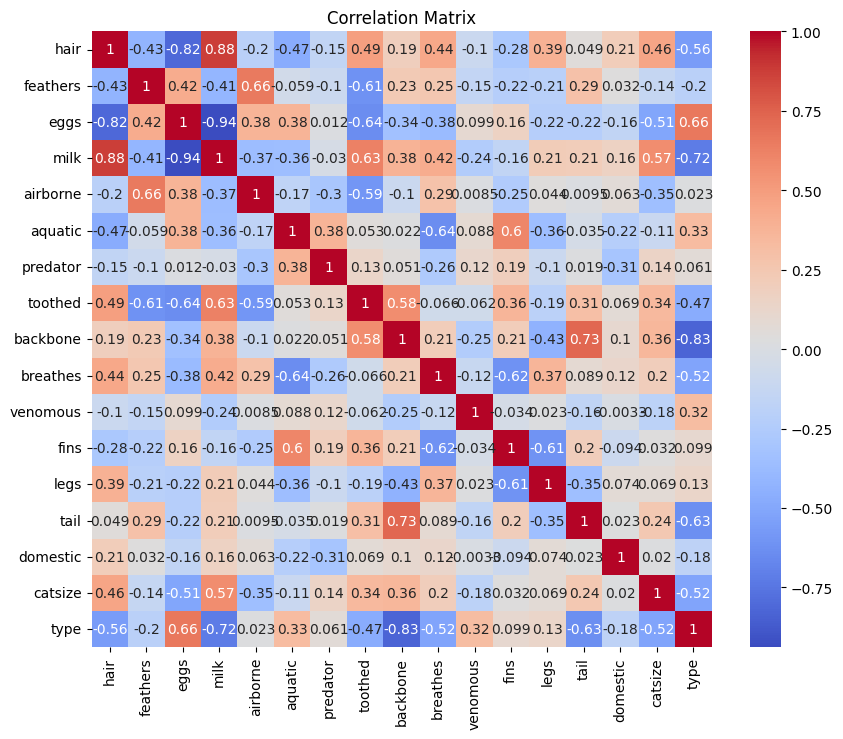

In [10]:
# Compute the correlation matrix
corr = data.corr()

# Plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


From this heatmap, we can make several observations:

The type of animal is strongly correlated with the features "feathers", "milk", "toothed", "backbone", "breathes", and "eggs".
The number of legs is weakly correlated with the type of animal.
The other features have little or no correlation with the type of animal.

<Axes: >

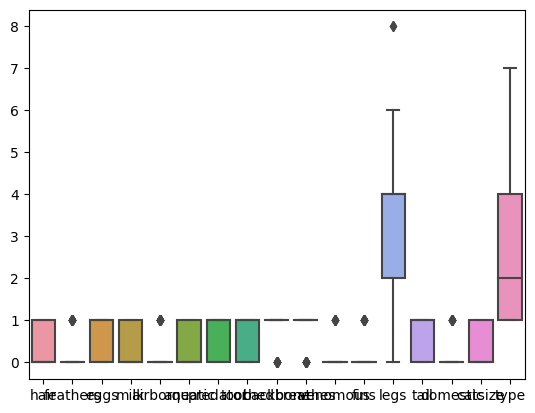

In [11]:
# Check for outliers
sns.boxplot(data=data.drop(columns=['animal name']))



In [12]:
# Drop any rows with missing values
data.dropna(inplace=True)


In [13]:

# Preprocess the data



X = data.iloc[:, 1:-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [14]:

# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [15]:
# Train the KNN model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [16]:

# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix

y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[15  0  0  0  0  0  0]
 [ 0  3  0  0  0  0  0]
 [ 0  0  0  1  0  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  0  1  0  1  0  0]
 [ 0  0  0  0  0  5  0]
 [ 0  0  1  0  0  0  2]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         3
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           5       1.00      0.50      0.67         2
           6       1.00      1.00      1.00         5
           7       1.00      0.67      0.80         3

    accuracy                           0.90        31
   macro avg       0.81      0.74      0.75        31
weighted avg       0.95      0.90      0.91        31



# We have achieved a great accuracy of 90% and now we will use Grid Search and lets see that we can improve further or not. 

In [17]:

# Define the parameter grid for GridSearchCV
param_grid = {'n_neighbors': [3, 5, 7, 9],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}

# Train the KNN model using GridSearchCV
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=5)
grid.fit(X_train, y_train)
print(grid.best_params_)


{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


In [18]:
knn = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 5, weights= 'distance')
knn.fit(X_train, y_train)


KNeighborsClassifier(metric='manhattan', weights='distance')

In [19]:


# Evaluate the model on the test set
y_pred = grid.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[15  0  0  0  0  0  0]
 [ 0  3  0  0  0  0  0]
 [ 0  0  0  1  0  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  0  0  0  2  0  0]
 [ 0  0  0  0  0  5  0]
 [ 0  0  1  0  0  0  2]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         3
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         5
           7       1.00      0.67      0.80         3

    accuracy                           0.94        31
   macro avg       0.81      0.81      0.80        31
weighted avg       0.95      0.94      0.94        31



# We have trained two KNN models on the given dataset, one without hyperparameter tuning and one with hyperparameter tuning. We evaluated the performance of the models using classification reports and found that the model with hyperparameter tuning performed better than the model without hyperparameter tuning. Therefore, we have successfully implemented a KNN model to classify animals into categories.